In [1153]:
import math

import pandas as pd
import matplotlib.pyplot as plt

In [1154]:
#안찾아지는 컬럼
data_df = pd.read_csv("train.csv", index_col='no')
print("총 data size : ",data_df.shape[0] )

총 data size :  29305


In [1155]:
# data_df.age.describe()
# pd.DataFrame.plot.barh(data_df.age)
data_df_conti = data_df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income']]
data_df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].describe()


age        fnlwgt  education-num  capital-gain  capital-loss  \
count  29305.000000  2.930500e+04   29305.000000  29305.000000  29305.000000   
mean      38.659171  1.897357e+05      10.083057   1084.531786     87.073571   
std       13.743827  1.056348e+05       2.570371   7495.715677    401.225580   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176060e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.779550e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377130e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    29305.000000  
mean        40.440096  
std         12.332840  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

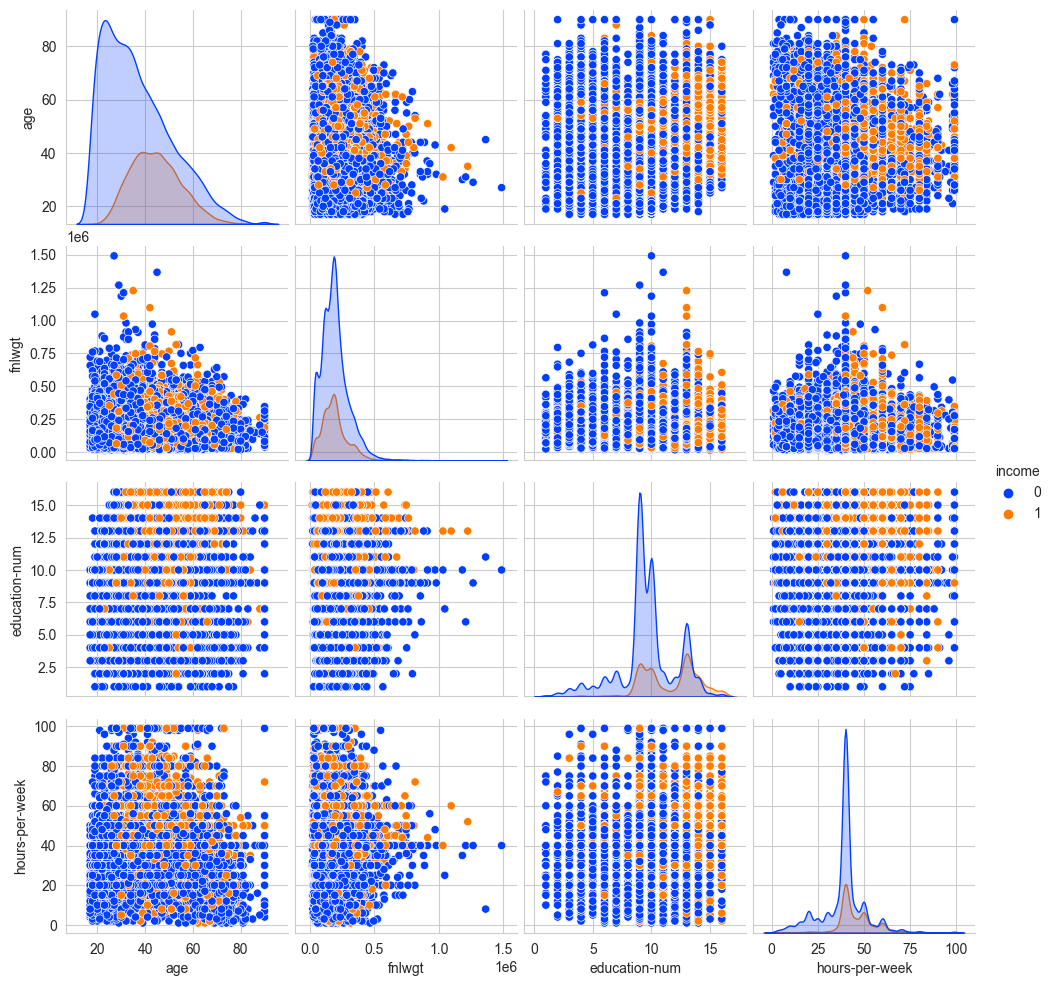

In [1156]:
data_df_conti = data_df[['age','fnlwgt','education-num','hours-per-week','income']]
import seaborn as sns
sns.pairplot(data_df_conti,
            diag_kind='kde', 
            hue = 'income',
            palette='bright')
plt.show()


# age ->
#### 5살 단위로 줄이자, 나이가 너무 많은 사람은 삭제하자

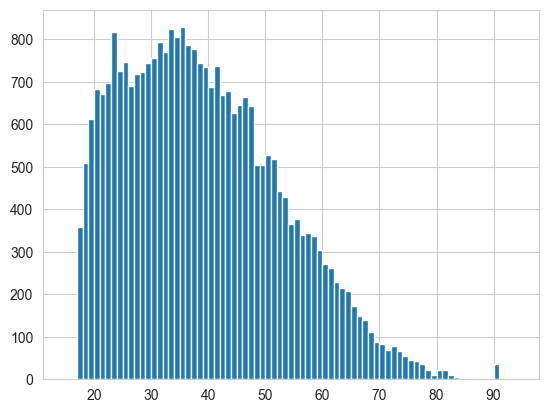

In [1157]:
# age -> 5살 단위로 줄이자, 나이가 너무 많은 사람은 삭제하자
plt.hist(data_df.age, bins=range(15, 95,1))
plt.show() # 90 대가 이상치 인것으로 생각됨.

<AxesSubplot: xlabel='age', ylabel='Count'>

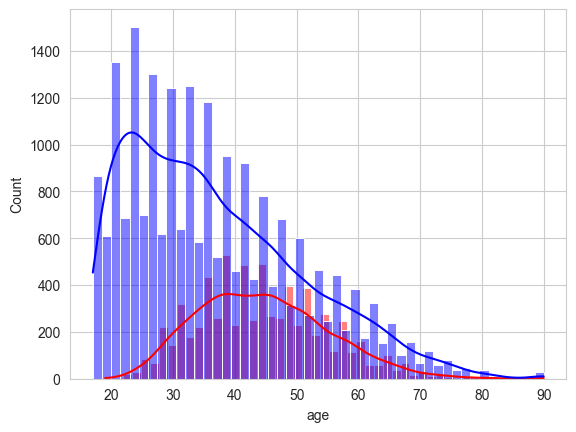

In [1158]:
import seaborn as sns
sns.histplot(data_df.age[data_df['income']==1], kde=True, color="red")
sns.histplot(data_df.age[data_df['income']==0], kde=True, color="blue")

<AxesSubplot: xlabel='age', ylabel='Density'>

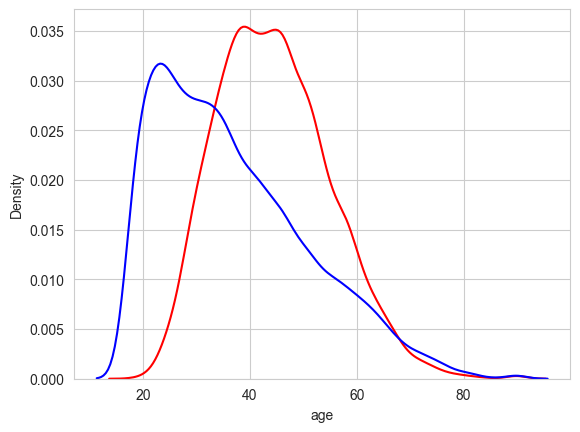

In [1159]:
import seaborn as sns
sns.kdeplot(data_df.age[data_df['income']==1], color="red")
sns.kdeplot(data_df.age[data_df['income']==0], color="blue")

## 범주화 코드

In [1160]:
from mylib import Mylib
from sklearn.preprocessing import MinMaxScaler
# data_df['age'] = Mylib.preProc_age(data_df['age'])

In [1161]:
data_df.head()

age workclass  fnlwgt      education  education-num       marital-status  \
no                                                                             
1    25   Private  219199           11th              7             Divorced   
2    39   Private   52978   Some-college             10             Divorced   
3    35   Private  196899      Bachelors             13        Never-married   
4    64   Private  135527      Assoc-voc             11             Divorced   
5    24   Private   60783   Some-college             10   Married-civ-spouse   

            occupation    relationship                 race      sex  \
no                                                                     
1    Machine-op-inspct   Not-in-family                White     Male   
2        Other-service   Not-in-family                White   Female   
3    Handlers-cleaners   Not-in-family   Asian-Pac-Islander   Female   
4         Tech-support   Not-in-family                White   Female   
5     Transport-moving         Husband                White     Male   

    capital-gain  capital-loss  hours-per-week  native-country  income  
no                                                                      
1              0             0              40   United-States       0  
2              0          1721              55   United-States       0  
3              0             0              50           Haiti       0  
4              0             0              40   United-States       0  
5              0             0              70   United-States       1

In [1162]:
data_df.age.unique()

array([25, 39, 35, 64, 24, 66, 56, 70, 21, 33, 45, 54, 63, 58, 44, 31, 17,
       43, 18, 23, 50, 19, 38, 29, 30, 47, 28, 22, 59, 34, 49, 36, 32, 46,
       42, 61, 40, 26, 57, 27, 41, 37, 60, 48, 62, 53, 68, 75, 20, 51, 73,
       69, 72, 65, 76, 52, 55, 74, 90, 67, 78, 80, 77, 71, 81, 83, 82, 79,
       85, 87, 84, 88, 86, 89])

# fnlwgt : 관계성이 없어 보이는데?

In [1163]:
data_df.fnlwgt.head()

no
1    219199
2     52978
3    196899
4    135527
5     60783
Name: fnlwgt, dtype: int64

<AxesSubplot: xlabel='fnlwgt', ylabel='Count'>

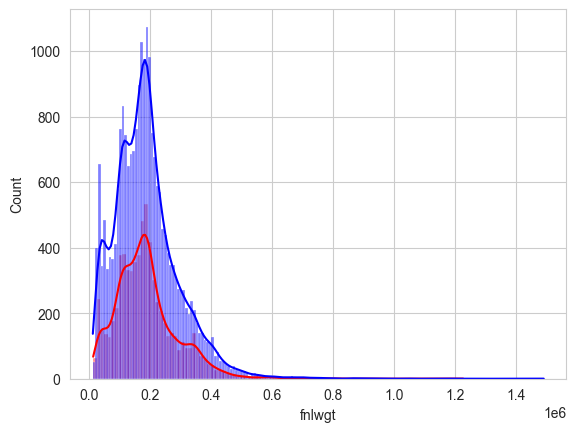

In [1164]:
sns.histplot(data_df.fnlwgt[data_df['income']==1], kde=True, color="red")
sns.histplot(data_df.fnlwgt[data_df['income']==0], kde=True, color="blue")

## 한쪽으로 너무 치우쳐 있다. 정규화 하자


## 카테고리화


In [1165]:
data_df.fnlwgt

no
1        219199
2         52978
3        196899
4        135527
5         60783
          ...  
29301    100605
29302    372636
29303    258474
29304    157446
29305     94809
Name: fnlwgt, Length: 29305, dtype: int64

# education-num
#### 이것도 범주화 하자

In [1166]:
#예를 들어 education_num이 11이면 Assoc_voc(전문학교 준학사)를,
# education_num이 13이면 Bachelors(학사)를,
# education_num이 9이면 HS-grad(고등학교 졸업)를 나타냅니다.
data_df['education-num'].value_counts()

9     9435
10    6558
13    4848
14    1587
11    1230
7     1057
12     980
6      816
4      574
15     500
5      430
8      415
16     347
3      334
2      148
1       46
Name: education-num, dtype: int64

## 범주화 코드

In [1167]:
data_df[data_df['education-num'].isnull()].shape


(0, 15)

In [1168]:
# # 1 ~ 3 : 초등학교
# # 4 ~ 6 : 중학교
# # 7 ~ 9 : 고등학교
# # 10 ~ 11 : 전문대
# # 12 ~ 13 : 대학교
# # 14 ~ : 대학원
# b = [0,3,6,9,11,13,40]
# # label = ['E','M','H','C','U','MA']
# label = [0,1,2,3,4,5]
# data_df['education-num'] =  pd.cut(data_df['education-num'], bins=b, labels=label)

In [1169]:
data_df['education-num'].head()

no
1     7
2    10
3    13
4    11
5    10
Name: education-num, dtype: int64

In [1170]:
data_df['education-num'].unique()

array([ 7, 10, 13, 11,  5,  9, 14,  3, 15,  8,  6, 12, 16,  4,  2,  1])

# 'capital-gain','capital-loss'
#### 데이터가 너무 없다.. 전부 드랍

<AxesSubplot: xlabel='capital-gain', ylabel='Count'>

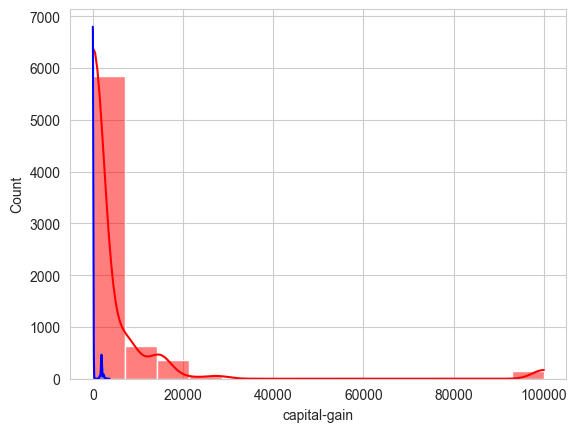

In [1171]:
sns.histplot(data_df['capital-gain'][data_df['income']==1],  kde=True, color="red")
sns.histplot(data_df['capital-loss'][data_df['income']==1], kde=True, color="blue")

<AxesSubplot: xlabel='capital-loss', ylabel='Density'>

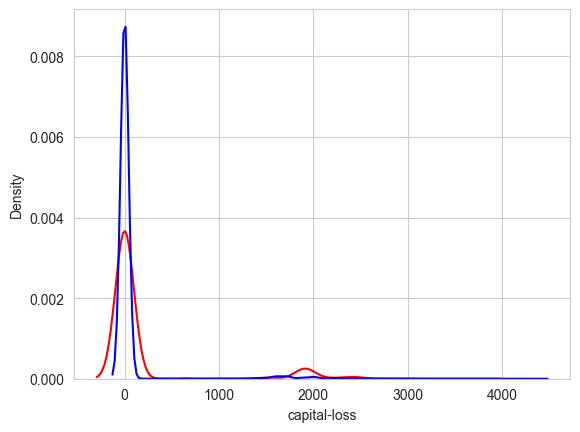

In [1172]:
sns.kdeplot(data_df['capital-loss'][data_df['income']==1], color="red")
sns.kdeplot(data_df['capital-loss'][data_df['income']==0], color="blue")

# workclass

In [1173]:
data_df.shape[0]

29305

In [1174]:
data_df.workclass.value_counts().apply(lambda x: x/data_df.shape[0] * 100)

 Private             69.646818
 Self-emp-not-inc     7.865552
 Local-gov            6.374339
 ?                    5.674800
 State-gov            4.098277
 Self-emp-inc         3.368026
 Federal-gov          2.914178
 Without-pay          0.040949
 Never-worked         0.017062
Name: workclass, dtype: float64

In [1175]:
df1 = data_df.workclass[data_df['income']==1].value_counts()
df1.name = 'winer'
df2 = data_df.workclass.value_counts()
df2.name = 'all'
df3 = pd.concat([df1, df2], axis=1)
df3.fillna(0)
df3.winer.fillna(0.0)
df3['rate']= df3['winer'].div(df3['all']).mul(100)
df3.sort_values(by='rate', ascending=False)

winer    all       rate
 Self-emp-inc       547.0    987  55.420466
 Federal-gov        327.0    854  38.290398
 Local-gov          559.0   1868  29.925054
 Self-emp-not-inc   643.0   2305  27.895879
 State-gov          315.0   1201  26.228143
 Private           4478.0  20410  21.940225
 ?                  175.0   1663  10.523151
 Without-pay          1.0     12   8.333333
 Never-worked         NaN      5        NaN

In [1176]:
wc_level_dic = {
    0: ['Never-worked'],    #0~5
    1: ['Without-pay'],     #5~10
    2: ['?'],               #10~15
    3: [],                  #15~20
    4: ['Private'],         #20~25
    5: ['State-gov','Self-emp-not-inc','Local-gov'], #25~30
    6: [],                  #30~35
    7: ['Federal-gov'],     #35~40
    8: [],                  #40~45
    9: [],                  #45~50
    10:[],                  #50~55
    11:['Self-emp-inc']     #55~
}

In [1177]:
def filter_workclass(X):
    for key, value in wc_level_dic.items():
        if str(X).strip() in value:
            return key
data_df['workclass'] = data_df['workclass'].apply(filter_workclass)

In [1178]:
data_df

age  workclass  fnlwgt      education  education-num  \
no                                                            
1       25          4  219199           11th              7   
2       39          4   52978   Some-college             10   
3       35          4  196899      Bachelors             13   
4       64          4  135527      Assoc-voc             11   
5       24          4   60783   Some-college             10   
...    ...        ...     ...            ...            ...   
29301   20          4  100605        HS-grad              9   
29302   21          4  372636        HS-grad              9   
29303   18          5  258474           10th              6   
29304   33          4  157446           11th              7   
29305   65          2   94809        HS-grad              9   

            marital-status          occupation    relationship  \
no                                                               
1                 Divorced   Machine-op-inspct   Not-in-family   
2                 Divorced       Other-service   Not-in-family   
3            Never-married   Handlers-cleaners   Not-in-family   
4                 Divorced        Tech-support   Not-in-family   
5       Married-civ-spouse    Transport-moving         Husband   
...                    ...                 ...             ...   
29301        Never-married               Sales       Own-child   
29302        Never-married               Sales       Own-child   
29303        Never-married     Farming-fishing       Own-child   
29304        Never-married        Craft-repair   Not-in-family   
29305              Widowed                   ?   Not-in-family   

                      race      sex  capital-gain  capital-loss  \
no                                                                
1                    White     Male             0             0   
2                    White   Female             0          1721   
3       Asian-Pac-Islander   Female             0             0   
4                    White   Female             0             0   
5                    White     Male             0             0   
...                    ...      ...           ...           ...   
29301                Other     Male             0             0   
29302                Black     Male             0             0   
29303                White     Male             0             0   
29304                White     Male             0             0   
29305                White   Female             0             0   

       hours-per-week  native-country  income  
no                                             
1                  40   United-States       0  
2                  55   United-States       0  
3                  50           Haiti       0  
4                  40   United-States       0  
5                  70   United-States       1  
...               ...             ...     ...  
29301              40     Puerto-Rico       0  
29302              40   United-States       0  
29303              40   United-States       0  
29304              65   United-States       0  
29305              40   United-States       0  

[29305 rows x 15 columns]

<AxesSubplot: xlabel='workclass', ylabel='Count'>

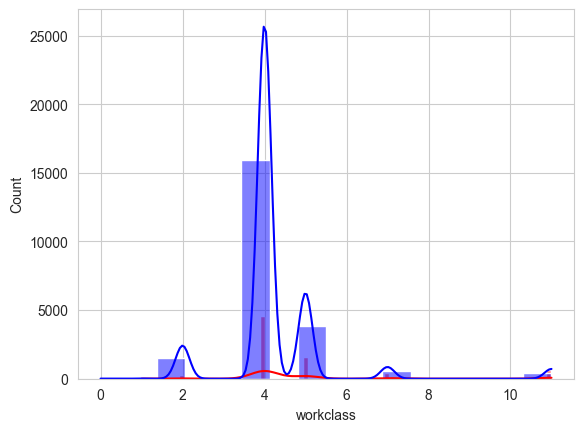

In [1179]:
sns.histplot(data_df.workclass[data_df['income']==1], kde=True, color="red")
sns.histplot(data_df.workclass[data_df['income']==0], kde=True, color="blue")


# marital-status

In [1180]:
data_df['marital-status'].unique()


array([' Divorced', ' Never-married', ' Married-civ-spouse', ' Separated',
       ' Married-spouse-absent', ' Widowed', ' Married-AF-spouse'],
      dtype=object)

In [1181]:
data_df['marital-status'].value_counts()

 Married-civ-spouse       13331
 Never-married             9673
 Divorced                  4030
 Widowed                    942
 Separated                  914
 Married-spouse-absent      394
 Married-AF-spouse           21
Name: marital-status, dtype: int64

# occupation
#### 직업간의 확률이 비슷한 것끼리 카테고리하자

In [1182]:
data_df.occupation.unique()

array([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
       ' Tech-support', ' Transport-moving', ' Farming-fishing',
       ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
       ' Protective-serv', ' Exec-managerial', ' ?', ' Craft-repair',
       ' Sales', ' Armed-Forces'], dtype=object)

<AxesSubplot: xlabel='occupation', ylabel='Count'>

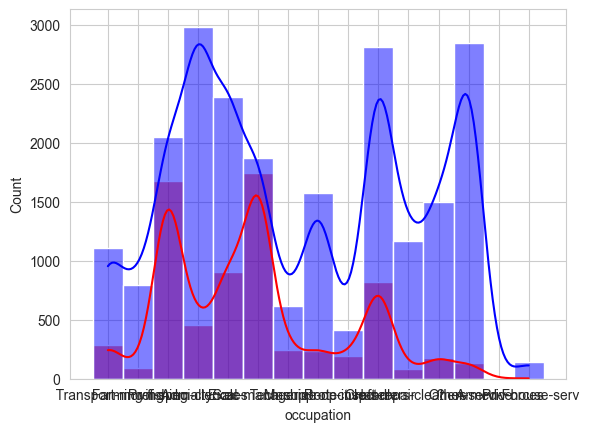

In [1183]:
sns.histplot(data_df.occupation[data_df['income']==1], kde=True, color="red")
sns.histplot(data_df.occupation[data_df['income']==0], kde=True, color="blue")

In [1184]:
a = pd.concat([data_df.occupation.value_counts(), data_df.occupation[data_df.income==1].value_counts()], axis=1)

In [1185]:
a['c'] = a.iloc[:,1] / a.iloc[:,0] * 100
a = a.sort_values(by='c', ascending=False)
display(a)

occupation  occupation          c
 Exec-managerial          3609        1739  48.185093
 Prof-specialty           3724        1672  44.897959
 Protective-serv           603         194  32.172471
 Armed-Forces               10           3  30.000000
 Tech-support              865         246  28.439306
 Sales                    3292         907  27.551640
 Craft-repair             3632         820  22.577093
 Transport-moving         1393         282  20.244078
 Adm-clerical             3440         458  13.313953
 Machine-op-inspct        1811         239  13.197129
 Farming-fishing           888          95  10.698198
 ?                        1668         175  10.491607
 Handlers-cleaners        1249          83   6.645316
 Other-service            2975         129   4.336134
 Priv-house-serv           146           3   2.054795

In [1186]:
a['c'] = a['c'].fillna(0)
level_dic = {
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[]
}
for ele in a.index:
    level = a.loc[ele]['c']
    if level < 5 : level_dic[0].append(ele)
    elif level < 10 : level_dic[1].append(ele)
    elif level < 15 : level_dic[2].append(ele)
    elif level < 20 : level_dic[3].append(ele)
    elif level < 25 : level_dic[4].append(ele)
    elif level < 30 : level_dic[5].append(ele)
    elif level < 35 : level_dic[6].append(ele)
    elif level < 40 : level_dic[7].append(ele)
    elif level < 45 : level_dic[8].append(ele)
    else : level_dic[9].append(ele)

print(level_dic)

{0: [' Other-service', ' Priv-house-serv'], 1: [' Handlers-cleaners'], 2: [' Adm-clerical', ' Machine-op-inspct', ' Farming-fishing', ' ?'], 3: [], 4: [' Craft-repair', ' Transport-moving'], 5: [' Tech-support', ' Sales'], 6: [' Protective-serv', ' Armed-Forces'], 7: [], 8: [' Prof-specialty'], 9: [' Exec-managerial']}


In [1187]:
def filter_country(X):
    for key, value in level_dic.items():
        if X in value:
            return key
data_df['occupation'] = data_df['occupation'].apply(filter_country)

In [1188]:
data_df

age  workclass  fnlwgt      education  education-num  \
no                                                            
1       25          4  219199           11th              7   
2       39          4   52978   Some-college             10   
3       35          4  196899      Bachelors             13   
4       64          4  135527      Assoc-voc             11   
5       24          4   60783   Some-college             10   
...    ...        ...     ...            ...            ...   
29301   20          4  100605        HS-grad              9   
29302   21          4  372636        HS-grad              9   
29303   18          5  258474           10th              6   
29304   33          4  157446           11th              7   
29305   65          2   94809        HS-grad              9   

            marital-status  occupation    relationship                 race  \
no                                                                            
1                 Divorced           2   Not-in-family                White   
2                 Divorced           0   Not-in-family                White   
3            Never-married           1   Not-in-family   Asian-Pac-Islander   
4                 Divorced           5   Not-in-family                White   
5       Married-civ-spouse           4         Husband                White   
...                    ...         ...             ...                  ...   
29301        Never-married           5       Own-child                Other   
29302        Never-married           5       Own-child                Black   
29303        Never-married           2       Own-child                White   
29304        Never-married           4   Not-in-family                White   
29305              Widowed           2   Not-in-family                White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
no                                                                           
1         Male             0             0              40   United-States   
2       Female             0          1721              55   United-States   
3       Female             0             0              50           Haiti   
4       Female             0             0              40   United-States   
5         Male             0             0              70   United-States   
...        ...           ...           ...             ...             ...   
29301     Male             0             0              40     Puerto-Rico   
29302     Male             0             0              40   United-States   
29303     Male             0             0              40   United-States   
29304     Male             0             0              65   United-States   
29305   Female             0             0              40   United-States   

       income  
no             
1           0  
2           0  
3           0  
4           0  
5           1  
...       ...  
29301       0  
29302       0  
29303       0  
29304       0  
29305       0  

[29305 rows x 15 columns]

# relationship

In [1189]:
data_df.relationship.unique()

array([' Not-in-family', ' Husband', ' Unmarried', ' Other-relative',
       ' Own-child', ' Wife'], dtype=object)

In [1190]:
a = pd.concat([data_df.relationship.value_counts(), data_df.relationship[data_df.income == 1].value_counts()], axis=1)
a['c'] = a.iloc[:, 1] / a.iloc[:, 0] * 100
a = a.sort_values(by='c', ascending=False)
display(a)

relationship  relationship          c
 Wife                    1370           639  46.642336
 Husband                11769          5320  45.203501
 Not-in-family           7637           803  10.514600
 Unmarried               3071           186   6.056659
 Other-relative           904            32   3.539823
 Own-child               4554            65   1.427317

# race

In [1191]:
data_df.race.value_counts().apply(lambda x: x/data_df.shape[0])

 White                 0.855861
 Black                 0.094728
 Asian-Pac-Islander    0.031360
 Amer-Indian-Eskimo    0.009896
 Other                 0.008156
Name: race, dtype: float64

In [1192]:
# data_df.race = data_df.race.apply(lambda x: 'others' if x in [' Asian-Pac-Islander',' Amer-Indian-Eskimo',' Other'] else x)

In [1193]:
data_df

age  workclass  fnlwgt      education  education-num  \
no                                                            
1       25          4  219199           11th              7   
2       39          4   52978   Some-college             10   
3       35          4  196899      Bachelors             13   
4       64          4  135527      Assoc-voc             11   
5       24          4   60783   Some-college             10   
...    ...        ...     ...            ...            ...   
29301   20          4  100605        HS-grad              9   
29302   21          4  372636        HS-grad              9   
29303   18          5  258474           10th              6   
29304   33          4  157446           11th              7   
29305   65          2   94809        HS-grad              9   

            marital-status  occupation    relationship                 race  \
no                                                                            
1                 Divorced           2   Not-in-family                White   
2                 Divorced           0   Not-in-family                White   
3            Never-married           1   Not-in-family   Asian-Pac-Islander   
4                 Divorced           5   Not-in-family                White   
5       Married-civ-spouse           4         Husband                White   
...                    ...         ...             ...                  ...   
29301        Never-married           5       Own-child                Other   
29302        Never-married           5       Own-child                Black   
29303        Never-married           2       Own-child                White   
29304        Never-married           4   Not-in-family                White   
29305              Widowed           2   Not-in-family                White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
no                                                                           
1         Male             0             0              40   United-States   
2       Female             0          1721              55   United-States   
3       Female             0             0              50           Haiti   
4       Female             0             0              40   United-States   
5         Male             0             0              70   United-States   
...        ...           ...           ...             ...             ...   
29301     Male             0             0              40     Puerto-Rico   
29302     Male             0             0              40   United-States   
29303     Male             0             0              40   United-States   
29304     Male             0             0              65   United-States   
29305   Female             0             0              40   United-States   

       income  
no             
1           0  
2           0  
3           0  
4           0  
5           1  
...       ...  
29301       0  
29302       0  
29303       0  
29304       0  
29305       0  

[29305 rows x 15 columns]

# sex

In [1194]:
data_df.sex.unique()

array([' Male', ' Female'], dtype=object)

In [1195]:
a = pd.concat([data_df.sex.value_counts(), data_df.sex[data_df.income == 1].value_counts()], axis=1)
a['c'] = a.iloc[:, 1] / a.iloc[:, 0] * 100
a = a.sort_values(by='c', ascending=False)
display(a)

sex   sex          c
 Male    19621  5987  30.513226
 Female   9684  1058  10.925238

# native-country
#### 비슷한 확률끼리 카테고리하자



In [1196]:
data_df['native-country'].unique()

array([' United-States', ' Haiti', ' Mexico', ' Puerto-Rico',
       ' Philippines', ' ?', ' Germany', ' Peru', ' Ecuador', ' Iran',
       ' Thailand', ' Dominican-Republic', ' Poland', ' Scotland',
       ' Italy', ' Jamaica', ' China', ' Portugal', ' Columbia',
       ' Hungary', ' Vietnam', ' Taiwan', ' Canada', ' Hong',
       ' Guatemala', ' El-Salvador', ' England',
       ' Outlying-US(Guam-USVI-etc)', ' India', ' France', ' Cuba',
       ' Greece', ' Trinadad&Tobago', ' South', ' Japan', ' Yugoslavia',
       ' Nicaragua', ' Ireland', ' Cambodia', ' Laos', ' Honduras',
       ' Holand-Netherlands'], dtype=object)

In [1197]:
import math
a = pd.concat([data_df['native-country'].value_counts(), data_df['native-country'][data_df.income == 1].value_counts()], axis=1)
a['c'] = a.iloc[:, 1] / a.iloc[:, 0] * 100
a = a.sort_values(by='c', ascending=False)
a['c'] = a['c'].round(0)
display(a)

native-country  native-country     c
 India                                   90            39.0  43.0
 Hungary                                 12             5.0  42.0
 Japan                                   54            21.0  39.0
 England                                 75            28.0  37.0
 Canada                                 111            41.0  37.0
 Iran                                    38            14.0  37.0
 Italy                                   60            22.0  37.0
 Greece                                  25             9.0  36.0
 Ireland                                 23             8.0  35.0
 Germany                                124            41.0  33.0
 Cambodia                                19             6.0  32.0
 Yugoslavia                              13             4.0  31.0
 Taiwan                                  39            12.0  31.0
 France                                  20             6.0  30.0
 Philippines                            178            50.0  28.0
 China                                   68            18.0  26.0
 United-States                        26301          6467.0  25.0
 ?                                      495           117.0  24.0
 Cuba                                    94            21.0  22.0
 Hong                                    19             4.0  21.0
 Ecuador                                 21             4.0  19.0
 South                                   74            14.0  19.0
 Portugal                                43             7.0  16.0
 Poland                                  53             8.0  15.0
 Thailand                                15             2.0  13.0
 Jamaica                                 68             9.0  13.0
 Peru                                    25             3.0  12.0
 Scotland                                 9             1.0  11.0
 Puerto-Rico                            117            12.0  10.0
 Honduras                                11             1.0   9.0
 Haiti                                   51             4.0   8.0
 Laos                                    13             1.0   8.0
 Outlying-US(Guam-USVI-etc)              15             1.0   7.0
 Mexico                                 579            31.0   5.0
 El-Salvador                             96             5.0   5.0
 Dominican-Republic                      61             3.0   5.0
 Guatemala                               51             2.0   4.0
 Columbia                                53             2.0   4.0
 Nicaragua                               28             1.0   4.0
 Vietnam                                 50             1.0   2.0
 Trinadad&Tobago                         13             NaN   NaN
 Holand-Netherlands                       1             NaN   NaN

In [1198]:
a['c'] = a['c'].fillna(0)

In [1199]:
level_dic = {
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[]
}
for ele in a.index:
    level = a.loc[ele]['c']
    if level < 5 : level_dic[0].append(ele)
    elif level < 10 : level_dic[1].append(ele)
    elif level < 15 : level_dic[2].append(ele)
    elif level < 20 : level_dic[3].append(ele)
    elif level < 25 : level_dic[4].append(ele)
    elif level < 30 : level_dic[5].append(ele)
    elif level < 35 : level_dic[6].append(ele)
    elif level < 40 : level_dic[7].append(ele)
    elif level < 45 : level_dic[8].append(ele)
    else : level_dic[9].append(ele)

print(level_dic)
# a.apply(lambda x: x['C'])

{0: [' Guatemala', ' Columbia', ' Nicaragua', ' Vietnam', ' Trinadad&Tobago', ' Holand-Netherlands'], 1: [' Honduras', ' Haiti', ' Laos', ' Outlying-US(Guam-USVI-etc)', ' Mexico', ' El-Salvador', ' Dominican-Republic'], 2: [' Thailand', ' Jamaica', ' Peru', ' Scotland', ' Puerto-Rico'], 3: [' Ecuador', ' South', ' Portugal', ' Poland'], 4: [' ?', ' Cuba', ' Hong'], 5: [' Philippines', ' China', ' United-States'], 6: [' Germany', ' Cambodia', ' Yugoslavia', ' Taiwan', ' France'], 7: [' Japan', ' England', ' Canada', ' Iran', ' Italy', ' Greece', ' Ireland'], 8: [' India', ' Hungary'], 9: []}


In [1200]:
def filter_country(X):
    for key, value in level_dic.items():
        if X in value:
            return key
# data_df['native-country'] = data_df['native-country'].apply(filter_country)


In [1201]:
data_df['native-country'] = data_df['native-country'].apply(lambda x : x if x ==' United-States' else 'others')

### 완료

In [1202]:
final_data = data_df.drop(columns='education')

In [1203]:
final_data = final_data.drop(columns='fnlwgt')

In [1204]:
final_data2 = pd.get_dummies(final_data, columns=['workclass','marital-status','occupation','relationship','race','sex','native-country'])

In [1205]:
final_data2

age  education-num  capital-gain  capital-loss  hours-per-week  income  \
no                                                                              
1       25              7             0             0              40       0   
2       39             10             0          1721              55       0   
3       35             13             0             0              50       0   
4       64             11             0             0              40       0   
5       24             10             0             0              70       1   
...    ...            ...           ...           ...             ...     ...   
29301   20              9             0             0              40       0   
29302   21              9             0             0              40       0   
29303   18              6             0             0              40       0   
29304   33              7             0             0              65       0   
29305   65              9             0             0              40       0   

       workclass_0  workclass_1  workclass_2  workclass_4  ...  \
no                                                         ...   
1                0            0            0            1  ...   
2                0            0            0            1  ...   
3                0            0            0            1  ...   
4                0            0            0            1  ...   
5                0            0            0            1  ...   
...            ...          ...          ...          ...  ...   
29301            0            0            0            1  ...   
29302            0            0            0            1  ...   
29303            0            0            0            0  ...   
29304            0            0            0            1  ...   
29305            0            0            1            0  ...   

       relationship_ Wife  race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  \
no                                                                              
1                       0                         0                         0   
2                       0                         0                         0   
3                       0                         0                         1   
4                       0                         0                         0   
5                       0                         0                         0   
...                   ...                       ...                       ...   
29301                   0                         0                         0   
29302                   0                         0                         0   
29303                   0                         0                         0   
29304                   0                         0                         0   
29305                   0                         0                         0   

       race_ Black  race_ Other  race_ White  sex_ Female  sex_ Male  \
no                                                                     
1                0            0            1            0          1   
2                0            0            1            1          0   
3                0            0            0            1          0   
4                0            0            1            1          0   
5                0            0            1            0          1   
...            ...          ...          ...          ...        ...   
29301            0            1            0            0          1   
29302            1            0            0            0          1   
29303            0            0            1            0          1   
29304            0            0            1            0          1   
29305            0            0            1            1          0   

       native-country_ United-States  native-country_others  
no                                       

In [1206]:
# final_data2= final_data2.drop(columns='capital-gain')

# 이제 확률 계산하기


In [1207]:
from sklearn.model_selection import train_test_split
X = final_data2.drop(columns='income')
Y = final_data['income']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3,random_state=20)

In [1208]:
X_train.shape,y_train.shape

((20513, 42), (20513,))

# Random ForestClassifier

In [1209]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=500, random_state=0, max_depth=9)

forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=0)

In [1210]:
forest_model.score(X_test,y_test)

0.8655595996360328

# GDB

In [1211]:
from sklearn.ensemble import HistGradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.23,random_state=20)
GDB_model = HistGradientBoostingClassifier(max_depth=4)
GDB_model.fit(X_train, y_train)

HistGradientBoostingClassifier(max_depth=4)

In [1212]:
GDB_model.score(X_test,y_test)

0.8779112891262424

In [1213]:
X_train.shape

(22564, 42)

In [1214]:
from sklearn.model_selection import cross_val_score
GDB_model_result = cross_val_score(GDB_model, X_test, y_test, cv = 10)

print('교차검증 결과:', GDB_model_result)
print('교차검증 결과 평균값', GDB_model_result.mean())

교차검증 결과: [0.86518519 0.86795252 0.84569733 0.8694362  0.87833828 0.87091988
 0.88130564 0.87091988 0.884273   0.88724036]
교차검증 결과 평균값 0.8721268271238598


In [1215]:
import joblib
joblib.dump(GDB_model, "gdb_model_v1.pkl")

['gdb_model_v1.pkl']

In [1216]:
# # test code
# from tqdm import tqdm
# score = []
# for idx in tqdm(range(0,50)):
#     X_train, X_test, y_train, y_test = train_test_split(final_data2.drop(columns='income'), final_data['income'], test_size=0.23, random_state=idx)
#     GDB_model = HistGradientBoostingClassifier(max_depth=4)
#     GDB_model.fit(X_train, y_train)
#     score.append((idx,GDB_model.score(X_test,y_test)))
# best = 0
# index = 0
# for ele in score:
#     if best < ele[1]:
#         best = ele[1]
#         index = ele[0]
# best,index

# Xgboost

In [1217]:
import xgboost
print(xgboost.__version__)

1.6.2


In [1284]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25,random_state=98)
xgb_clf = xgb.XGBClassifier(
    # enable_categorical=True,
    gamma=0.25,
    max_depth=4,
    learning_rate=0.15,
    n_estimators=100,
    tree_method='auto',
    n_jobs=-1,
    min_child_weight=1.1)
                        # learning_rate=0.6,
                        # n_estimators=500,
                        # n_jobs=-1,
                        # random_state=42)
# xgb_clf.fit(X_train, y_train,verbose=True)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.87160	validation_1-auc:0.88320
[1]	validation_0-auc:0.87974	validation_1-auc:0.89129
[2]	validation_0-auc:0.88937	validation_1-auc:0.90077
[3]	validation_0-auc:0.89321	validation_1-auc:0.90388
[4]	validation_0-auc:0.89302	validation_1-auc:0.90507
[5]	validation_0-auc:0.89469	validation_1-auc:0.90601
[6]	validation_0-auc:0.89604	validation_1-auc:0.90717
[7]	validation_0-auc:0.89841	validation_1-auc:0.90924
[8]	validation_0-auc:0.89993	validation_1-auc:0.91063
[9]	validation_0-auc:0.90127	validation_1-auc:0.91175
[10]	validation_0-auc:0.90225	validation_1-auc:0.91276


/Users/hojune/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/hojune/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.90429	validation_1-auc:0.91483
[12]	validation_0-auc:0.90547	validation_1-auc:0.91586
[13]	validation_0-auc:0.90724	validation_1-auc:0.91751
[14]	validation_0-auc:0.90915	validation_1-auc:0.91896
[15]	validation_0-auc:0.91002	validation_1-auc:0.91960
[16]	validation_0-auc:0.91012	validation_1-auc:0.91959
[17]	validation_0-auc:0.91101	validation_1-auc:0.92008
[18]	validation_0-auc:0.91146	validation_1-auc:0.92071
[19]	validation_0-auc:0.91224	validation_1-auc:0.92114
[20]	validation_0-auc:0.91281	validation_1-auc:0.92174
[21]	validation_0-auc:0.91322	validation_1-auc:0.92212
[22]	validation_0-auc:0.91403	validation_1-auc:0.92274
[23]	validation_0-auc:0.91492	validation_1-auc:0.92325
[24]	validation_0-auc:0.91549	validation_1-auc:0.92355
[25]	validation_0-auc:0.91566	validation_1-auc:0.92361
[26]	validation_0-auc:0.91616	validation_1-auc:0.92407
[27]	validation_0-auc:0.91659	validation_1-auc:0.92402
[28]	validation_0-auc:0.91705	validation_1-auc:0.92446
[29]	valid

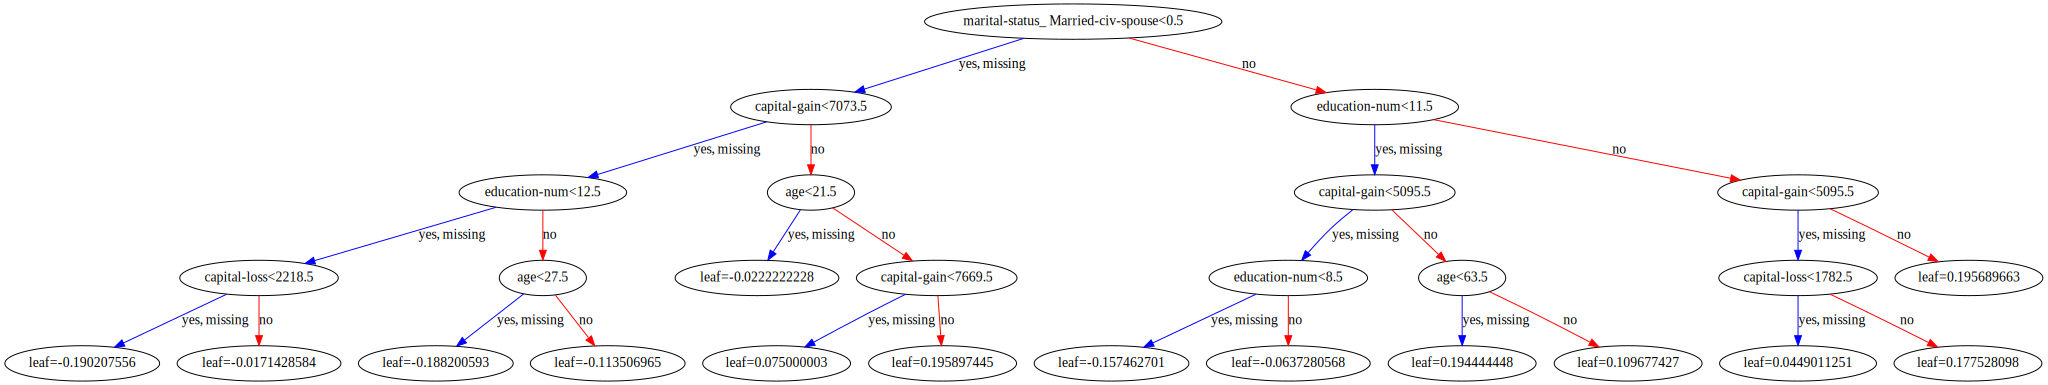

In [1268]:
xgb.to_graphviz(xgb_clf, num_trees=0, size="10,10")

In [1285]:
from sklearn.model_selection import cross_val_score
tree_model_result = cross_val_score(xgb_clf, X_test, y_test, cv=10, n_jobs=4, verbose=True)

print('교차검증 결과:', tree_model_result)
print('교차검증 결과 평균값', tree_model_result.mean())

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


교차검증 결과: [0.88267394 0.89495225 0.85402456 0.86903138 0.8840382  0.8622101
 0.89222374 0.88114754 0.87021858 0.89071038]
교차검증 결과 평균값 0.8781230663714504


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.9s finished


In [1286]:
print(xgb_clf.score(X_train,y_train))
xgb_clf.score(X_test,y_test)

0.8727818727818728


0.8815340521359356

In [1287]:
xgb_clf.save_model('model.json')

# hyper paramer 추적! - random data

In [1250]:
from tqdm import tqdm
score = []
for idx in tqdm(range(0,100)):
    X_train, X_test, y_train, y_test = train_test_split(final_data2.drop(columns='income'), final_data['income'], test_size=0.18, random_state=idx)
    xgb_clf = xgb.XGBClassifier(
        gamma=0.25,
        max_depth=4,
        learning_rate=0.13,
        n_estimators=100,
        tree_method='auto',
        n_jobs=-1,
        min_child_weight=1.1)
    xgb_clf.fit(X_train, y_train)
    xgb_model_result = cross_val_score(xgb_clf, X_test, y_test, cv=10, n_jobs=-1, verbose=True)
    score.append((idx, xgb_model_result.mean()))


  0%|          | 0/100 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished
  1%|          | 1/100 [00:06<10:18,  6.25s/it][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished
  2%|▏         | 2/100 [00:09<07:46,  4.77s/it][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished
  3%|▎         | 3/100 [00:13<07:07,  4.41s/it][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.7

In [1251]:
best = 0
index = 0
for ele in score:
    if best < ele[1]:
        best = ele[1]
        index = ele[0]
best,index

(0.8763979932148812, 98)

In [1225]:
best,index

(0.8794358507734303, 98)